In [3]:
import subprocess
import sys
import random
import os
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def print_tautology_blif_switch_sum(
    input_size, 
    file            = 'test.temp',
    index           = None
):
    '''
    print_tautology_blif_simple:
        1. Generate an tautology logic with <input_size> inputs
        2. Write the result to <file>
        3. Random Shufle the product if <shuffle_product> is True
        4. Random Shufle the sum if <shuffle_sum> is True
    '''
    with open(file,'w') as f:
        f.write('.model test\n')
        f.write('.inputs '+' '.join(['input'+str(index) for index in range(input_size)])+'\n')
        f.write('.outputs out\n')
        # single products in random order
        for combination in range(2**input_size):
            terms = [*range(input_size)]
            f.write('.names '+' '.join(['input'+str(index) for index in terms])+' node'+str(combination)+'\n')
            f.write(('{0:0'+str(input_size)+'b}').format(combination)+' 1\n')
        # sum all the products in random order
        seq = [*range(2**input_size)]
        # swap two element
        if index is None:
            index = random.randint(2,2**input_size-1)
        seq[1], seq[index] = seq[index], seq[1] 
        f.write('.names '+' '.join(['node'+str(index) for index in seq])+' out\n')
        f.write('0'*(2**input_size)+' 0\n')
        f.write('.end\n')
        return seq
def run_synthesis(file = 'test.temp', opt_command='compress2rs'):
    commands = [
        'read_blif {0}'.format(file),
        'strash',
        'ps',
        'write_blif src.temp',
        opt_command,
        'ps',
        'write_blif res.temp'
    ]
    shell_command = './abc -c \"{0}\"'.format(';'.join(commands))
    return subprocess.getoutput(shell_command)
def parse_report(report, verbose = False):
    assert report is not None
    result = None, None
    for report_line in report.split('\n'):
        obj = re.match(r'.*and =(.*)lev =(.*)', report_line, re.M|re.I)
        if obj is None:
            continue
        result = area, level = int(obj.group(1).strip()), int(obj.group(2).strip())
        if verbose:
            print('area = {0}, level = {1}'.format(area,level))
    return result

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  8.74it/s]
477


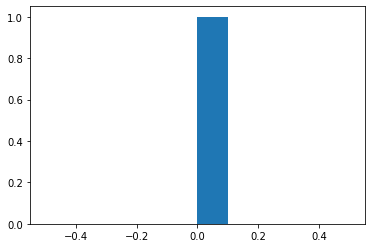

In [27]:
input_size = 10
iteration = 1
results = []
for _ in tqdm(range(iteration), ncols = 80):
    index = random.randint(0,2**input_size-1)
    print_tautology_blif_switch_sum(input_size, index=1)
    report = run_synthesis(opt_command='compress2rs')
    area, level = parse_report(report)
    results.append(area)
    print(index)
plt.hist(results)
plt.show()